In [1]:
import pandas as pd

# At Kaggle Kernel

## Data Loading

In [14]:
df = pd.read_csv('../input/facebook-recruiting-iii-keyword-extraction/Train.zip')

## Data Preprocessing

### Checking for duplicates

In [15]:
start = datetime.now()
duplicate_pairs = df.sort_values('Title', ascending=False).duplicated('Title')
print("Total number of duplicate questions : ", duplicate_pairs.sum())
df = df[~duplicate_pairs]
print("Dataframe shape after duplicate removal : ", df.shape)
print('Time taken to run this cell: ', datetime.now() - start)

Total number of duplicate questions :  1908962


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Dataframe shape after duplicate removal :  (4125233, 4)
Time taken to run this cell:  0:01:06.932039


In [20]:
df_reduced = df[:500000:]

In [17]:
df.shape

(4125233, 4)

In [21]:
df_reduced.shape

(500000, 4)

In [ ]:
df_reduced.head()

In [22]:
import os
os.chdir(r'/kaggle/working')

In [23]:
df_reduced.to_csv(r'dataset.csv')

In [24]:
from IPython.display import FileLink
FileLink(r'dataset.csv')

/kaggle/working/train.csv

# At Jupyter-Lab(Google Cloud's AI Platform Notebook)

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df.shape

(500000, 5)

In [5]:
df.head()

,Unnamed: 0,Id,Title,Body,Tags
0,0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,6,7,How to draw barplot in this way with Coreplot,<p>My image is cannot post so the link is my ...,core-plot


## Tag Counting

In [6]:
from datetime import datetime
start = datetime.now()
df['tag_count'] = df['Tags'].apply(lambda text: len(text.split(' ')))
print('Time taken to run this cell: ', datetime.now()- start)
df.head()

Time taken to run this cell:  0:00:00.386695


,Unnamed: 0,Id,Title,Body,Tags,tag_count
0,0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...,5
1,1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox,1
2,2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning,3
3,3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding,3
4,6,7,How to draw barplot in this way with Coreplot,<p>My image is cannot post so the link is my ...,core-plot,1


In [7]:
df.tag_count.value_counts()

3    143184
2    132338
4     96685
1     67942
5     59851
Name: tag_count, dtype: int64

## Analysis of Tags 

### 1. Total no. of Unique Tags

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
tag_dtm = vectorizer.fit_transform(df['Tags'])

In [11]:
print('Number of data points: ', tag_dtm.shape[0])
print('Number of unique tags: ', tag_dtm.shape[1])

Number of data points:  500000
Number of unique tags:  30605


In [12]:
tags = vectorizer.get_feature_names()
print('Some of the tags we have: ', tags[:10])

Some of the tags we have:  ['.a', '.app', '.aspxauth', '.bash-profile', '.class-file', '.cs-file', '.doc', '.drv', '.ds-store', '.each']


### 2. Number of times a tag appeared

In [13]:
freqs = tag_dtm.sum(axis = 0).A1
result = dict(zip(tags, freqs))

In [15]:
import csv
with open('tag_counts_dict_dtm.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in result.items():
        writer.writerow([key, value])

In [16]:
tag_df = pd.read_csv('tag_counts_dict_dtm.csv', names=['Tags', 'Counts'])
tag_df.head()

,Tags,Counts
0,opensuse-11.3,3
1,windows-8-people-app,1
2,jsoncpp,3
3,acts-as-tree,5
4,file-metadata,3


In [17]:
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df_sorted['Counts'].values

In [26]:
print(tag_df_sorted)

                     Tags  Counts
27314                  c#   39547
24983                java   35688
471                   php   33880
2739           javascript   31777
1497              android   28118
...                   ...     ...
10021          controlbox       1
23107      delphi-unicode       1
10007  gembox-spreadsheet       1
10006                fink       1
15302          lxterminal       1

[30605 rows x 2 columns]


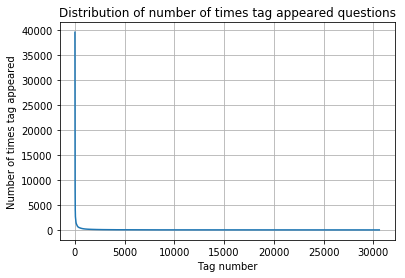

In [18]:
import matplotlib.pyplot as plt

plt.plot(tag_counts)
plt.title('Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel('Tag number')
plt.ylabel('Number of times tag appeared')
plt.show()

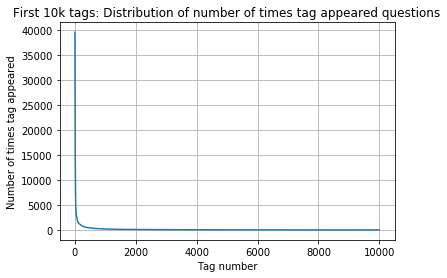

400 [39547  5269  2677  2156  1586  1316  1203  1074   962   845   761   687
   630   589   546   511   490   470   443   426   411   392   375   356
   337   329   313   300   286   276   268   256   246   240   232   223
   215   210   202   197   191   186   180   175   171   166   162   159
   156   152   150   147   144   140   137   135   132   130   128   125
   123   121   119   117   115   113   111   110   108   106   104   103
   102   100    98    96    95    93    91    90    89    87    86    85
    84    83    82    80    80    78    77    76    75    74    73    72
    71    70    69    68    67    66    65    64    63    63    62    61
    60    60    59    59    58    57    57    56    55    55    54    54
    53    52    52    51    51    50    50    49    48    48    47    47
    47    46    46    45    45    44    44    43    43    42    42    41
    41    41    40    40    39    39    39    38    38    38    37    37
    37    37    36    36    36    35    35    3

In [21]:
plt.plot(tag_counts[0:10000])
plt.title('First 10k tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel('Tag number')
plt.ylabel('Number of times tag appeared')
plt.show()
print(len(tag_counts[0:10000:25]), tag_counts[0:10000:25])

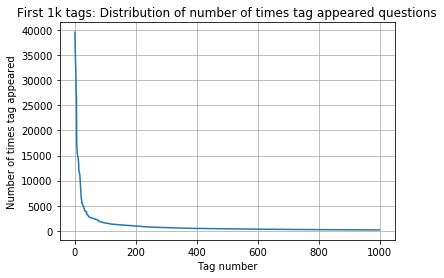

200 [39547 26348 14663 11461  7343  5269  4502  3836  3254  2923  2677  2578
  2483  2382  2281  2156  1858  1784  1759  1618  1586  1540  1502  1420
  1355  1316  1291  1279  1238  1213  1203  1183  1141  1123  1109  1074
  1057  1042   997   977   962   934   924   906   871   845   835   820
   795   775   761   752   736   720   704   687   673   658   651   638
   630   624   621   614   596   589   581   570   561   556   546   539
   531   528   519   511   508   506   497   494   490   483   482   480
   474   470   464   458   454   448   443   440   436   431   430   426
   423   420   418   415   411   406   400   398   395   392   390   385
   383   381   375   373   369   364   360   356   354   352   347   343
   337   336   334   332   330   329   325   320   318   316   313   312
   309   308   304   300   300   295   294   290   286   283   282   280
   276   276   274   272   272   270   268   266   263   261   259   256
   254   252   250   248   246   244   243   24

In [22]:
plt.plot(tag_counts[0:1000])
plt.title('First 1k tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:1000:5]), tag_counts[0:1000:5])

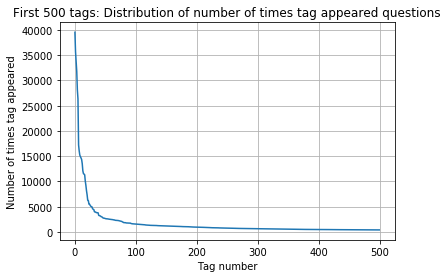

100 [39547 26348 14663 11461  7343  5269  4502  3836  3254  2923  2677  2578
  2483  2382  2281  2156  1858  1784  1759  1618  1586  1540  1502  1420
  1355  1316  1291  1279  1238  1213  1203  1183  1141  1123  1109  1074
  1057  1042   997   977   962   934   924   906   871   845   835   820
   795   775   761   752   736   720   704   687   673   658   651   638
   630   624   621   614   596   589   581   570   561   556   546   539
   531   528   519   511   508   506   497   494   490   483   482   480
   474   470   464   458   454   448   443   440   436   431   430   426
   423   420   418   415]


In [23]:
plt.plot(tag_counts[0:500])
plt.title('First 500 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:500:5]), tag_counts[0:500:5])

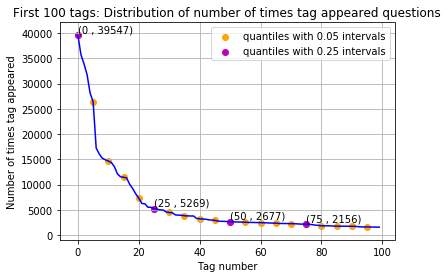

20 [39547 26348 14663 11461  7343  5269  4502  3836  3254  2923  2677  2578
  2483  2382  2281  2156  1858  1784  1759  1618]


In [24]:
plt.plot(tag_counts[0:100], c='b')
plt.scatter(x=list(range(0,100,5)), y=tag_counts[0:100:5], c='orange', label="quantiles with 0.05 intervals")

# quantiles with 0.25 difference
plt.scatter(x=list(range(0,100,25)), y=tag_counts[0:100:25], c='m', label = "quantiles with 0.25 intervals")

for x,y in zip(list(range(0,100,25)), tag_counts[0:100:25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500))

plt.title('First 100 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.legend()
plt.show()

print(len(tag_counts[0:100:5]), tag_counts[0:100:5])

In [25]:
# Store tags greater than 10K in one list
lst_tags_gt_10k = tag_df[tag_df.Counts>10000].Tags

#Print the length of the list
print ('{} Tags are used more than 10000 times'.format(len(lst_tags_gt_10k)))

# Store tags greater than 100K in one list
lst_tags_gt_100k = tag_df[tag_df.Counts>100000].Tags

#Print the length of the list.
print ('{} Tags are used more than 100000 times'.format(len(lst_tags_gt_100k)))

18 Tags are used more than 10000 times
0 Tags are used more than 100000 times


##### Observation:

1. There are total 18 tags which are used more than 10K times.
2. 0 tags are used more than 100K times
3. Most frequent tag(i.e., c#) is used 39,547 times.
4. Since some tags occur much more frequently than others, Micro-averaged F1 score is the appropriate metric for this problem.

### 3. Tags per question

In [28]:
tag_quest_count = tag_dtm.sum(axis=1).tolist()
tag_quest_count = [int(j) for i in tag_quest_count for j in i]

print('We have a total {} datapoints.'.format(len(tag_quest_count)))
print(tag_quest_count[:5])

We have a total 500000 datapoints.
[5, 1, 3, 3, 1]


In [29]:
print('Maximum number of tags per question: %d'%max(tag_quest_count))
print('Minimum number of tags per question: %d'%min(tag_quest_count))
print('Avg. number of tags per question: %f'% ((sum(tag_quest_count)*1.0)/len(tag_quest_count)))

Maximum number of tags per question: 5
Minimum number of tags per question: 1
Avg. number of tags per question: 2.896330


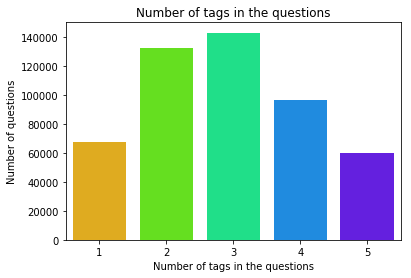

In [31]:
import seaborn as sns
sns.countplot(tag_quest_count, palette='gist_rainbow')
plt.title('Number of tags in the questions')
plt.xlabel('Number of tags in the questions')
plt.ylabel('Number of questions')
plt.show()

##### Observations:

1. Maximum number of tags per question: 5
2. Minimum number of tags per question: 1
3. Average number of tags per question: 2.896
4. Most of the questions are having 2 or 3 tags

### 4. Most Frequent tags

In [39]:
from wordcloud import WordCloud

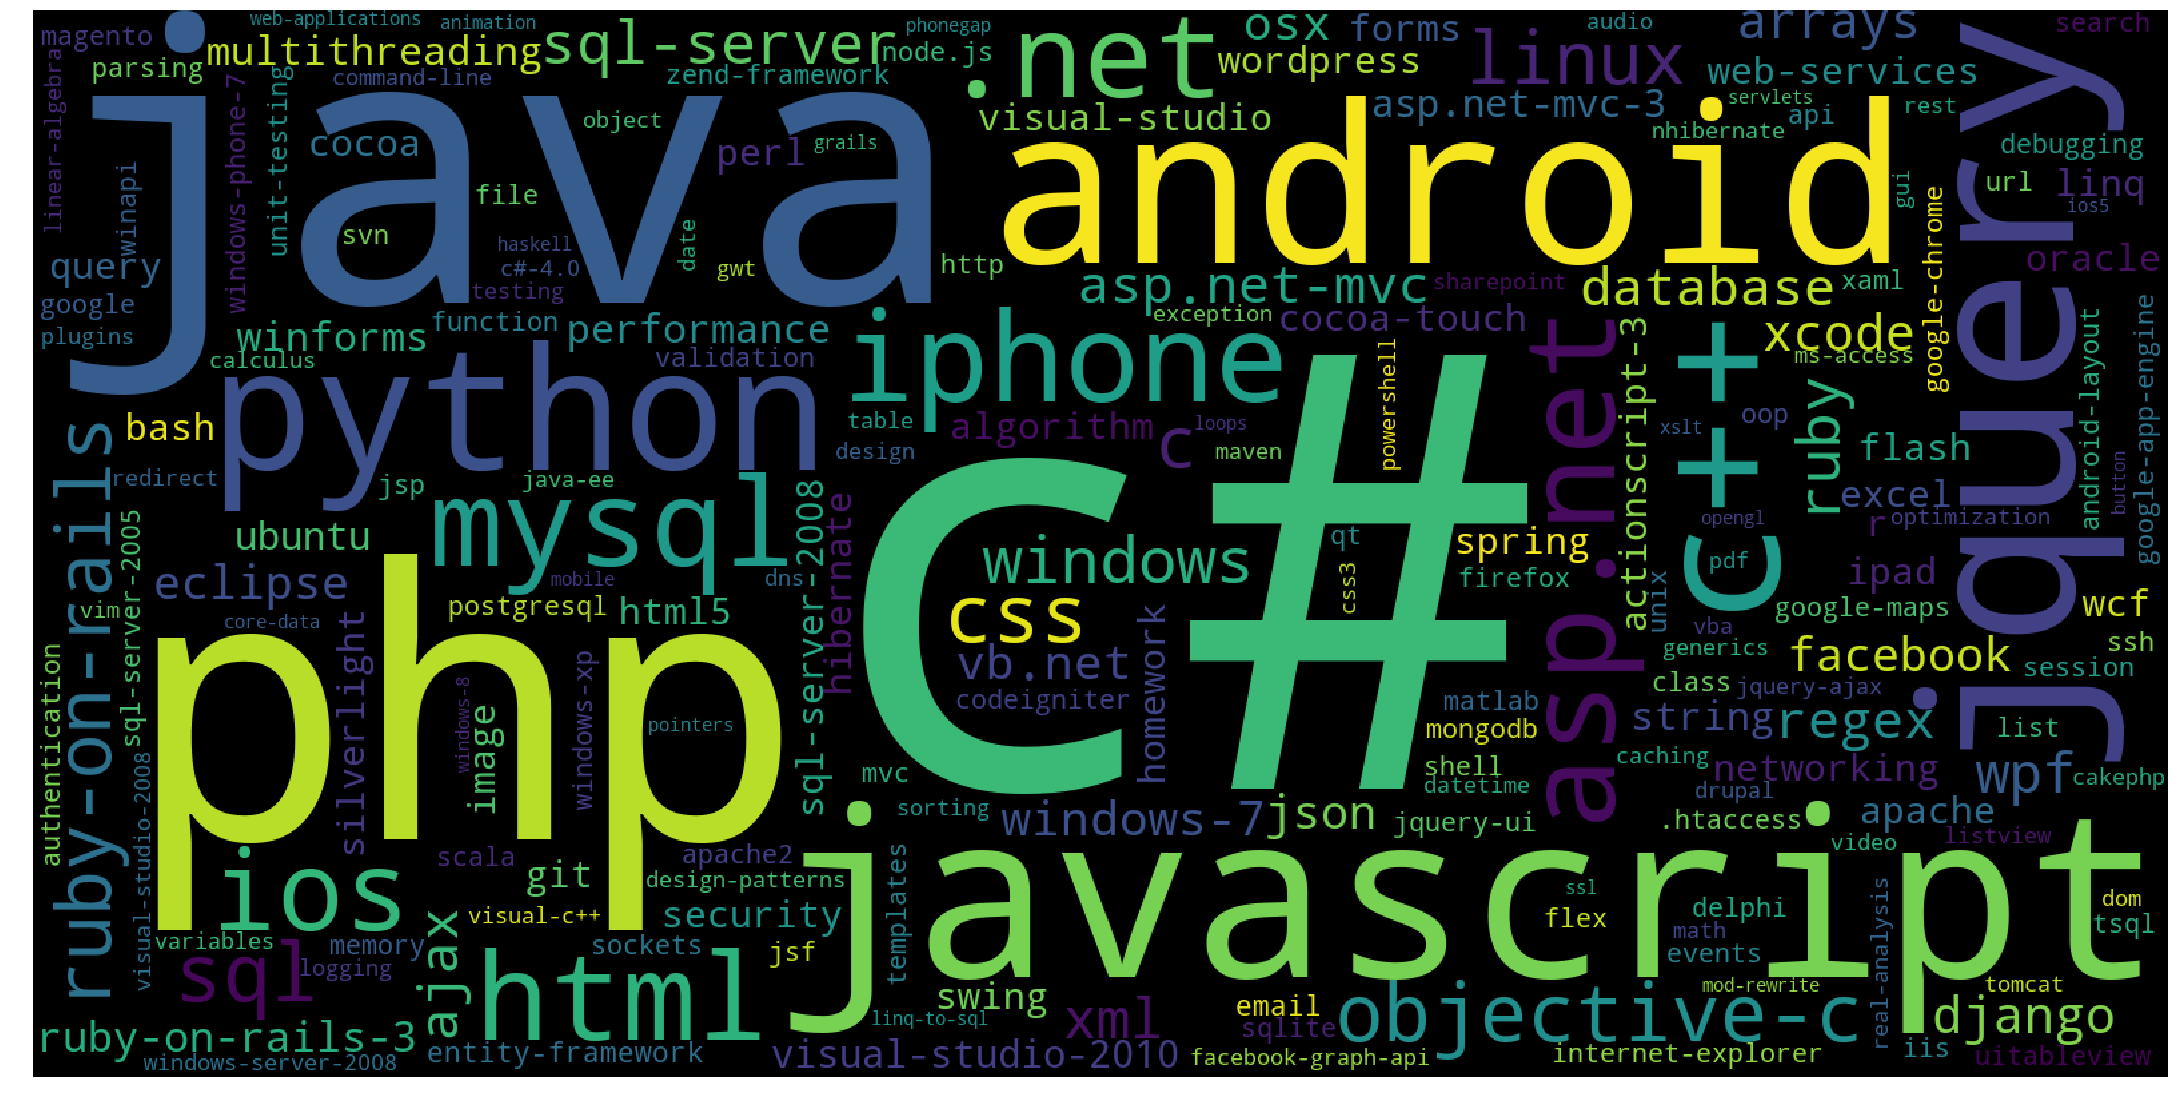

Time taken to run this cell : 0:00:05.265582


In [40]:
# Ploting word cloud
start = datetime.now()

# Lets first convert the 'result' dictionary to 'list of tuples'
tup = dict(result.items())

#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()
print("Time taken to run this cell :", datetime.now() - start)

##### Observations

A look at the word cloud shows that 'c#', 'java', 'php', 'asp.net', 'javascript', 'c++', are some of the most frequent tags.

### 4. The top 20 tags

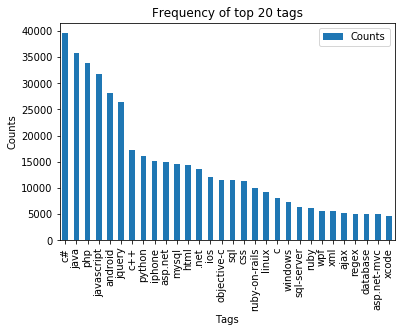

In [43]:
import numpy as np

i=np.arange(30)
tag_df_sorted.head(30).plot(kind='bar')
plt.title('Frequency of top 20 tags')
plt.xticks(i, tag_df_sorted['Tags'])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

##### Observations:

1. Majority of the most frequent tags are programming language.
2. C# is the top most frequent programming language.
3. Android, iOS, Linux and Windows are among the top most frequent operating systems.

## Cleaning and Preprocessing of questions

### 1. Preprocessing

1. Separate out code-snippets from body
2. Removal of special characters from questions title and description(not in code)
3. Remove stop words except 'C'
4. Remove HTML tags
5. Convert all the characters into small letters
6. Use SnowballStemmer to stem the words.

In [50]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
def striphtml(data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(data))
    return cleantext

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

In [55]:
# source: https://www.kaggle.com/vikashrajluhaniwal/multi-label-classification-for-tag-predictions

import re
from nltk.tokenize import word_tokenize
#nltk.download('punkt')

qus_list=[]
qus_with_code = 0
len_before_preprocessing = 0 
len_after_preprocessing = 0 
for index,row in df.iterrows():
    title, body, tags = row["Title"], row["Body"], row["Tags"]
    if '<code>' in body:
        qus_with_code+=1
    len_before_preprocessing+=len(title) + len(body)
    body=re.sub('<code>(.*?)</code>', '', body, flags=re.MULTILINE|re.DOTALL)
    body = re.sub('<.*?>', ' ', str(body.encode('utf-8')))
    title=title.encode('utf-8')
    question=str(title)+" "+str(body)
    question=re.sub(r'[^A-Za-z]+',' ',question)
    words=word_tokenize(str(question.lower()))
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))
    qus_list.append(question)
    len_after_preprocessing += len(question)
df["question"] = qus_list
avg_len_before_preprocessing=(len_before_preprocessing*1.0)/df.shape[0]
avg_len_after_preprocessing=(len_after_preprocessing*1.0)/df.shape[0]
print( "Avg. length of questions(Title+Body) before preprocessing: ", avg_len_before_preprocessing)
print( "Avg. length of questions(Title+Body) after preprocessing: ", avg_len_after_preprocessing)
print ("% of questions containing code: ", (qus_with_code*100.0)/df.shape[0])

[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Avg. length of questions(Title+Body) before preprocessing:  1169.263122
Avg. length of questions(Title+Body) after preprocessing:  326.407934
% of questions containing code:  57.8738


In [56]:
df.head()

,Unnamed: 0,Id,Title,Body,Tags,tag_count,question
0,0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...,5,check upload file imag without mime type like ...
1,1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox,1,prevent firefox close press ctrl favorit edito...
2,2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning,3,error invalid type list variabl import matlab ...
3,3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding,3,replac special charact url probabl simpl simpl...
4,6,7,How to draw barplot in this way with Coreplot,<p>My image is cannot post so the link is my ...,core-plot,1,draw barplot way coreplot imag post link pictu...


In [57]:
preprocessed_df = df[['question', 'Tags']]
preprocessed_df.shape

(500000, 2)

In [58]:
preprocessed_df.head()

,question,Tags
0,check upload file imag without mime type like ...,php image-processing file-upload upload mime-t...
1,prevent firefox close press ctrl favorit edito...,firefox
2,error invalid type list variabl import matlab ...,r matlab machine-learning
3,replac special charact url probabl simpl simpl...,c# url encoding
4,draw barplot way coreplot imag post link pictu...,core-plot


In [59]:
preprocessed_df.to_csv(r'preprocessed.csv')

# Machine Learning Models

# Model-1

## 1. Bag of Words(upto 4 gram), computing micro f1 score with Logistic Regression

### 1.1 Converting tags for multilabel problem

In [6]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(preprocessed_data['Tags'])

We will sample the number of tags instead considering all of them (due to limitation of computing power)

In [7]:
def tags_to_choose(n):
    t = multilabel_y.sum(axis=0).tolist()[0]
    sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
    multilabel_yn=multilabel_y[:,sorted_tags_i[:n]]
    return multilabel_yn

def questions_explained_fn(n):
    multilabel_yn = tags_to_choose(n)
    x= multilabel_yn.sum(axis=1)
    return (np.count_nonzero(x==0))

In [8]:
import numpy as np

questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=preprocessed_data.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))

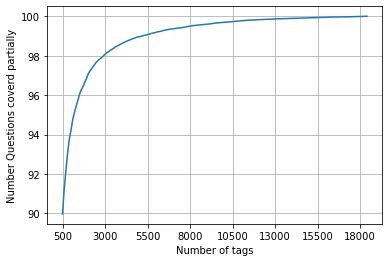

with  5500 tags we are covering  99.073 % of questions


In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()
# you can choose any number of tags based on your computing power, minimun is 50(it covers 90% of the tags)
print("with ",5500,"tags we are covering ",questions_explained[50],"% of questions")

In [9]:
multilabel_yx = tags_to_choose(5500)
print("number of questions that are not covered :", questions_explained_fn(5500),"out of ", total_qs)

number of questions that are not covered : 927 out of  100000


In [10]:
print("Number of tags in sample :", multilabel_y.shape[1])
print("number of tags taken :", multilabel_yx.shape[1],"(",(multilabel_yx.shape[1]/multilabel_y.shape[1])*100,"%)")

Number of tags in sample : 18424
number of tags taken : 5500 ( 29.852366478506298 %)


We are covering approx. 18% tags which cover 99% of questions

### 1.2 Split the data into test and train(80:20)

In [11]:
total_size=preprocessed_data.shape[0]
train_size=int(0.80*total_size)

x_train=preprocessed_data.head(train_size)
x_test=preprocessed_data.tail(total_size - train_size)

y_train = multilabel_yx[0:train_size,:]
y_test = multilabel_yx[train_size:total_size,:]

In [12]:
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)

Number of data points in train data : (80000, 5500)
Number of data points in test data : (20000, 5500)


### 1.3 Featurizing data into Bag of Words

In [13]:
from datetime import datetime

start = datetime.now()
vectorizer = CountVectorizer(ngram_range=(1,1), max_features=20000)
x_train_multilabel = vectorizer.fit_transform(x_train['question'])
x_test_multilabel = vectorizer.transform(x_test['question'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:00:04.455341


In [ ]:
# this will be taking so much time try not to run it, download the lr_with_equal_weight.pkl file and use to predict
# This takes about 6-7 hours to run.
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier


lr = SGDClassifier(loss='log', max_iter=250, verbose=1, n_jobs=-1)

classifier = OneVsRestClassifier(lr)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict(x_test_multilabel)



In [ ]:
#import pickle

#with open('model-1.pickle', 'wb') as f:
 #   pickle.dump([classifier, predictions], f)

In [14]:
import pickle

with open('model-1.pickle', 'rb') as f:
    classifier, predictions = pickle.load(f)

In [18]:
from sklearn import metrics
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
#print("Precision recall report :\n",metrics.classification_report(y_test_50, predictions_50))

accuracy : 0.0618
macro f1 score : 0.0839773574847159
micro f1 scoore : 0.33954364664015074
hamming loss : 0.00045890909090909093


# Model - 2

In [16]:
import math
parlist = [10**x for x in range(-5, 6)]
#parameters = {'alpha': parlist}
#print(parameters)

In [ ]:
# this will be taking so much time try not to run it, download the lr_with_equal_weight.pkl file and use to predict
# This takes about 6-7 hours to run.

from sklearn.linear_model import SGDClassifier


tuned_parameters = {'estimator__alpha': parlist}
start = datetime.now() 
classifier = GridSearchCV(OneVsRestClassifier(SGDClassifier(loss='log', penalty='l1', n_jobs=-1)), tuned_parameters) 
classifier.fit(x_train_multilabel, y_train) 
predictions = classifier.predict (x_test_multilabel )

In [ ]:
#import pickle

#with open('model-2.pickle', 'wb') as f:
 #   pickle.dump([classifier, predictions], f)

In [13]:
import pickle

with open('model-2.pickle', 'rb') as f:
    classifier, predictions = pickle.load(f)

In [14]:

from sklearn import metrics

print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
#print("Precision recall report :\n",metrics.classification_report(y_test, predictions))


accuracy : 0.0497
macro f1 score : 0.022818780381892275
micro f1 scoore : 0.27030993697660366
hamming loss : 0.0004610181818181818


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


# Model - 3

In [ ]:
# this will be taking so much time try not to run it, download the lr_with_equal_weight.pkl file and use to predict
# This takes about 6-7 hours to run.
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier


lr = SGDClassifier(loss='hinge', max_iter=250, verbose=1, n_jobs=-1)

classifier = OneVsRestClassifier(lr)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict(x_test_multilabel)

In [16]:
#import pickle

#with open('model-3.pickle', 'wb') as f:
 #   pickle.dump([classifier, predictions], f)

In [14]:
import pickle

with open('model-3.pickle', 'rb') as f:
    classifier, predictions = pickle.load(f)

In [15]:
from sklearn import metrics

print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
#print("Precision recall report :\n",metrics.classification_report(y_test, predictions))

accuracy : 0.06655
macro f1 score : 0.13239657031924393
micro f1 scoore : 0.3660259449733134
hamming loss : 0.00047404545454545453


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


# Conclusion

In [6]:
from prettytable import PrettyTable

In [7]:
x = PrettyTable()

In [8]:
x.field_names = ['Model', 'Micro F1 Score']

In [9]:
x.add_row(['Model 1- SGD with loss= log', '0.33954364664015074'])
x.add_row(['Model 2- Logistic Regression Grid Search', '0.27030993697660366'])
x.add_row(['Model 3- SGD with loss = hinge', '0.3660259449733134'])

In [10]:
print(x)

+------------------------------------------+---------------------+
|                  Model                   |    Micro F1 Score   |
+------------------------------------------+---------------------+
|       Model 1- SGD with loss= log        | 0.33954364664015074 |
| Model 2- Logistic Regression Grid Search | 0.27030993697660366 |
|      Model 3- SGD with loss = hinge      |  0.3660259449733134 |
+------------------------------------------+---------------------+


# Summary

So, far the best Micro F1 Score is acheived on Model 3 which is SGD one vs rest classifier for loss = Hinge(Suport Vector Classifier) which is 0.36. Rest can be observed from the above table.